<a href="https://colab.research.google.com/github/MuriloCardVars/skills-introduction-to-github/blob/main/V_A_M_O_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import zeros
import numpy as np

In [ ]:
caminho_arquivo = "/content/log 2.csv"

df=pd.read_csv(caminho_arquivo, header=None)

lista_inteiros = [int(valor) for valor in df.values.flatten()]

print(lista_inteiros)

[255, 255, 255, 255, 255, 255, 255, 255, 255, 11, 11, 11, 11, 11, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 35, 255, 255, 255, 255, 255, 27, 255, 255, 255, 255, 25, 25, 24, 25, 24, 22, 21, 25, 20, 22, 25, 24, 255, 25, 255, 255, 255, 25, 26, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 32, 29, 16, 16, 16, 16, 16, 16, 16, 16, 27, 26, 25, 25, 26, 27, 25, 26, 25, 25, 25, 25, 33, 28, 255, 255, 25, 255, 27, 255, 25, 30, 17, 21, 21, 34, 20, 21, 24, 255, 255, 255, 255, 255, 28, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 10, 9, 9, 9, 8, 8, 8, 8, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

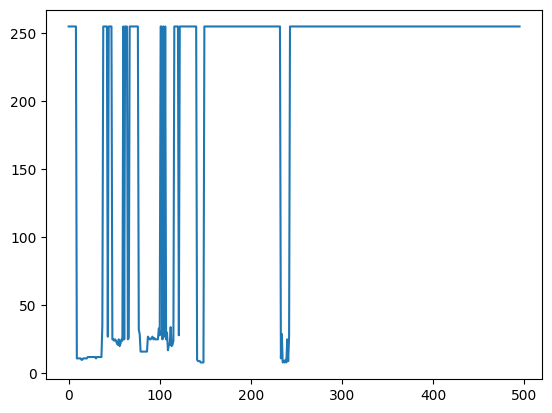

In [ ]:

lista1=lista_inteiros
tamanho_lista=len(lista1)


plt.plot(lista1)

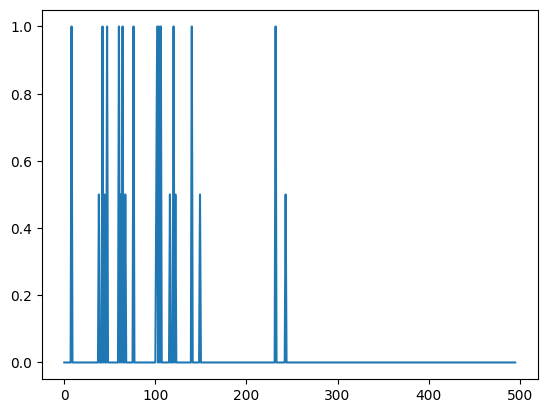

In [ ]:
def DetecObj(dados):
  objetos = zeros(tamanho_lista)
  #coloca 1 para o começo de um objeto e -1 para o fim
  for i in range(tamanho_lista-1):

    if dados[i+1]-dados[i]>=50:
      objetos[i+1]=0.5
    if dados[i]-dados[i+1]>=50:
      objetos[i]= 1

  return objetos


obj=DetecObj(lista1)
plt.plot(obj)

In [ ]:

def limpaRuido(objDet):
  for i in range(len(objDet)):
    if objDet[i]== 1 and objDet[i+1]==0 or objDet[i]== 1 and objDet[i+1]==0 :
      objDet[i+1]=1
    elif objDet[i]== 1 and objDet[i+1]==0.5:
      objDet[i+1]=0.5
    elif objDet[i]==0.5 and 1 in objDet[i+1:i+8]:
      objDet[i:i+8]=1
  return objDet

objeto= limpaRuido(obj)

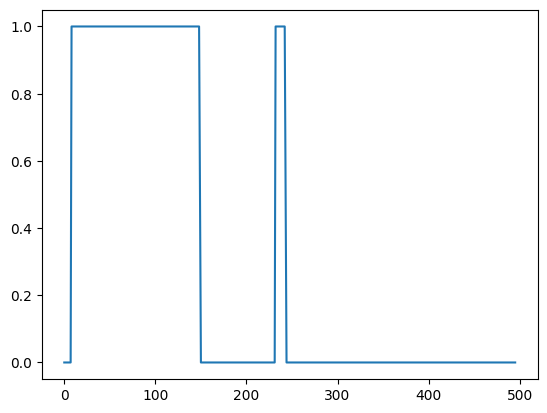

In [ ]:
plt.plot(objeto)

In [ ]:
from sqlalchemy import true
Objetos= {
    'Inicio': [],
    'Fim': [],
    'Tamanho': []
}

for i in range(len(objeto)):
  if objeto[i] == 1 and objeto [i-1]==0:
      Objetos['Inicio'].append(i)
  if objeto[i] == 0.5 and objeto [i+1]==0:
      Objetos['Fim'].append(i)

Fim= Objetos['Fim']
Inic =Objetos['Inicio']

for i in range(len(Objetos['Inicio'])):
  t =  Fim[i] - Inic[i] + 1
  Objetos['Tamanho'].append(t)

Df= pd.DataFrame(Objetos)

Df.to_csv('objetos.csv')